### 협업일지
#### 일자 : 2025-02-25 / 박하진

#### 오늘 할 일
-
- 
-

#### 오늘 한 일
- 데이터 확인 및 erd 관계도 작성
- 데이터 기초 탐색 및 오류값 처리

#### 내일 할 일
-
-
-

#### Codes

In [ ]:
trial_visit_info['first_enter_time'] = pd.to_datetime(trial_visit_info['first_enter_time'], errors='coerce')

mean_time = trial_visit_info['first_enter_time'].mean()

trial_visit_info['first_enter_time'].fillna(mean_time, inplace=True)

In [ ]:
trial_visit_info['first_enter_time'] = trial_visit_info['first_enter_time'].fillna(trial_visit_info['date'].apply(lambda d: d.replace(hour=9, minute=21)))

In [ ]:
# 'trial_date'를 datetime 형식으로 변환
trial_register["trial_date"] = pd.to_datetime(trial_register["trial_date"], errors="coerce")

# 체험신청일시 간격 계산
trial_register = trial_register.sort_values("trial_date")
trial_register['체험신청간격'] = trial_register.groupby('user_uuid')['trial_date'].diff().dt.days

# 3일 내에 재신청한 경우 제외 (체험신청간격이 3일 이하인 경우만 필터링)
trial_register = trial_register[trial_register['체험신청간격'].isna() | (trial_register['체험신청간격'] > 3)]  # 3일 내 재신청이 아닌 경우만 남기기

trial_register

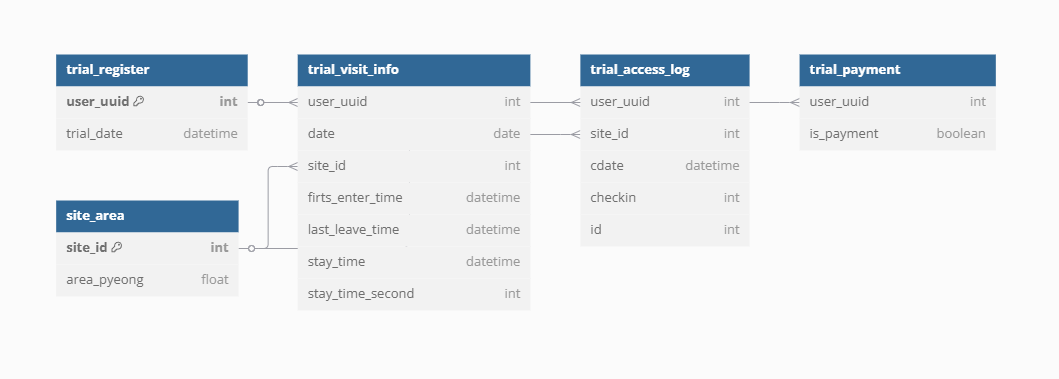

#### Issues & Challenges
- 데이터 셋의 오류값 처리
-
-

#### Reflection
- 데이터 분석을 하기 전 분석할 데이터를 온전한 상태로 하는것이 옳다고 생각하여 기초 탐색 후 데이터 오류값 처리를 먼저 실시했습니다.
- 우선 첫 번째 오류인 체험 신청인 경우, 같은 날 2회 신청한 경우: 1명이 같은 날에 2번 체험을 신청했을 경우는 전산 오류나 매니저의 임시 권한 부여로 발생한 것으로, 한 번의 체험 신청만 남기고 나머지 데이터를 제거하고, 서로 다른 날 2회 신청한 경우: 방문하지 않아서 다른 날에 재신청한 케이스라면, 첫 번째 체험 신청 이후 3일 내에 방문하지 않은 경우에만 두 번째 체험 신청을 남기고 첫 번째 체험 신청을 제거하는 방식으로 오류값을 처리했습니다.
- 두 번째 오류인 time의 결측치인 경우에는, 팀원분과의 상의 후 enter_time을 평균값으로 채운 후, leave_time을 enter_time에 stay_time을 더하여 결측치를 채웠습니다. 이 방법이 괜찮은지 저녁에 있을 멘토링 때 멘토님께 피드백 받을 예정입니다.